In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import sklearn.svm
import seaborn as sns
import scipy.io as sio
import matplotlib.pyplot as plt

Dataset 1 can be separated by a linear decision boundry.

First, merge data from separate training examples into a single dataframe: 

In [4]:
mat = sio.loadmat('ex6data1.mat')
print(mat.keys())
data = pd.DataFrame(mat.get('X'), columns=['X1', 'X2'])
data['y'] = mat.get('y')

data.head(5)
#data.tail(5)

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


,X1,X2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


# Visualize Dataset 1

Text(0, 0.5, 'X2')

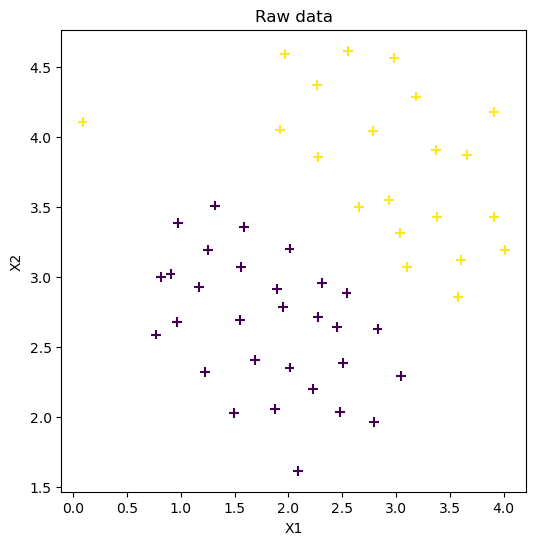

In [5]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(data['X1'], data['X2'], s=50, c=data['y'], marker = '+')
ax.set_title('Raw data')
ax.set_xlabel('X1')
ax.set_ylabel('X2')

# Explore C, an SVM parameter for misclassification penalty
## $C=1$
http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

In [16]:
svc100 = sklearn.svm.LinearSVC(C=100, loss='hinge')
svc100.fit(data[['X1', 'X2']], data['y'])
svc100.score(data[['X1', 'X2']], data['y'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9803921568627451

In [17]:
data['SVM C=100 Confidence'] = svc100.decision_function(data[['X1', 'X2']])

Text(0.5, 1.0, 'SVM (C=100) Decision Confidence')

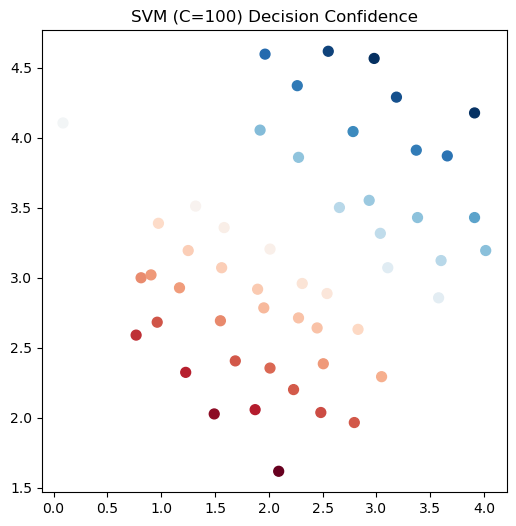

In [18]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM C=100 Confidence'], cmap='RdBu')
ax.set_title('SVM (C=100) Decision Confidence')

In [19]:
data.head()

,X1,X2,y,SVM C=100 Confidence
0,1.9643,4.5957,1,3.533427
1,2.2753,3.8589,1,1.679461
2,2.9781,4.5651,1,4.654562
3,2.9320,3.5519,1,1.537972
4,3.5772,2.8560,1,0.207648
